# 0.**Problem Statement**

Develop a robust machine learning model to accurately predict appliance energy consumption in households. By utilizing this model, the company aims to improve energy efficiency recommendations, optimize power grid management, and help customers reduce their energy costs.


Attribute Information:
date, time year-month-day hour:minute:second

Appliances, energy use in Wh (target variable for prediction)

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional



**Project Benefits:**

Energy Optimization: The model will help identify factors influencing appliance energy consumption, allowing for more targeted energy-saving strategies.
Cost Reduction: By predicting energy usage accurately, customers can better manage their consumption and reduce energy bills.
Grid Management: Understanding household energy patterns can assist in better power grid management and load balancing.


**Deliverables:**

A documented machine learning model specifically designed for predicting appliance energy consumption.
Comprehensive data visualizations illustrating relationships between various environmental factors and energy usage.
A comparative analysis of different machine learning algorithms for this prediction task.


# 1. **Basic Libraries and Import Data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#set plot style
sns.set(color_codes=True)

plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.float_format',lambda x:'%.3f' % x)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Internship Project/Project 03/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
1,11-01-2016 17:10,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.480,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2,11-01-2016 17:20,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.370,733.700,92.000,6.333,55.333,5.100,28.643,28.643
3,11-01-2016 17:30,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
4,11-01-2016 17:40,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.130,733.900,92.000,5.667,47.667,4.900,10.084,10.084


# 2. **Perprocessing**

In [3]:
print('Dataset shape:',df.shape)

Dataset shape: (19735, 29)


In [4]:
print('Checked Null value :-',df.isnull().sum())

Checked Null value :- date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [5]:
print('Duplicatecd Checked :',df[df.duplicated()])

Duplicatecd Checked : Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []


In [6]:
print('Information about dataset')
print('\n',df.info())

Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 n

In [7]:
print('Data Described :- \n')
print('-'*80)
df.describe()

Data Described :- 

--------------------------------------------------------------------------------


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000
mean,97.695,3.802,21.687,40.260,20.341,40.420,22.268,39.243,20.855,39.027,19.592,50.949,7.911,54.609,20.267,35.388,22.029,42.936,19.486,41.552,7.413,755.523,79.750,4.040,38.331,3.761,24.988,24.988
std,102.525,7.936,1.606,3.979,2.193,4.070,2.006,3.255,2.043,4.341,1.845,9.022,6.090,31.150,2.110,5.114,1.956,5.224,2.015,4.151,5.318,7.399,14.901,2.451,11.795,4.195,14.497,14.497
min,10.000,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,15.330,29.815,-6.065,1.000,15.390,23.200,16.307,29.600,14.890,29.167,-5.000,729.300,24.000,0.000,1.000,-6.600,0.005,0.005
25%,50.000,0.000,20.760,37.333,18.790,37.900,20.790,36.900,19.530,35.530,18.277,45.400,3.627,30.025,18.700,31.500,20.790,39.067,18.000,38.500,3.670,750.933,70.333,2.000,29.000,0.900,12.498,12.498
50%,60.000,0.000,21.600,39.657,20.000,40.500,22.100,38.530,20.667,38.400,19.390,49.090,7.300,55.290,20.033,34.863,22.100,42.375,19.390,40.900,6.920,756.100,83.667,3.667,40.000,3.430,24.898,24.898
75%,100.000,0.000,22.600,43.067,21.500,43.260,23.290,41.760,22.100,42.157,20.620,53.663,11.256,83.227,21.600,39.000,23.390,46.536,20.600,44.338,10.400,760.933,91.667,5.500,40.000,6.570,37.584,37.584
max,1080.000,70.000,26.260,63.360,29.857,56.027,29.236,50.163,26.200,51.090,25.795,96.322,28.290,99.900,26.000,51.400,27.230,58.780,24.500,53.327,26.100,772.300,100.000,14.000,66.000,15.500,49.997,49.997


## Report
* RH_6 column is not corrlate with Temperature columns (T1,T2,T3,......T9,T_out)
* RH_Out coloumn is not corrlate with Temperature columns(T1,T2,T3......,T9,T_out)
* Windspeed coloumn is not corrlate with Temperature (T1,T2,T3.......,T9,T_out)
* Tdewpoint columns are corrlate with all Temperature of area and Humidity of areas apart from RH_6 area,press_mm_hg are not corrlate.
* RH_out column is not corrlate with Temperature (T1,....,T9,T_out) however it slightly corrlate with humidity but RH_6 is very corrlate it means"RH_6 area and RH_Out enviroment is same "

## Outlier Analysis

In [8]:
from scipy import stats

outlier_row_indices=set()
outlier_features=dict()

for column in df.drop(['date'],axis=1).columns:
  z_scores= stats.zscore(df[column])
  outlier_row_indices.update(np.where(np.abs(z_scores)>3)[0])
  outlier_features[column]=len(np.where(np.abs(z_scores)>3)[0])

print('No of rows with outlier attribute:\t',len(outlier_row_indices))
print('Percentage of rows with outlier attribute in dataset:{:.2%}'.format(len(outlier_row_indices)/df.shape[0]))
print('\n','-'*80)
print('Feature wise outlier count')
outlier_features

No of rows with outlier attribute:	 2391
Percentage of rows with outlier attribute in dataset:12.12%

 --------------------------------------------------------------------------------
Feature wise outlier count


{'Appliances': 540,
 'lights': 647,
 'T1': 14,
 'RH_1': 109,
 'T2': 206,
 'RH_2': 131,
 'T3': 54,
 'RH_3': 14,
 'T4': 0,
 'RH_4': 0,
 'T5': 23,
 'RH_5': 567,
 'T6': 98,
 'RH_6': 0,
 'T7': 0,
 'RH_7': 24,
 'T8': 0,
 'RH_8': 7,
 'T9': 0,
 'RH_9': 0,
 'T_out': 95,
 'Press_mm_hg': 107,
 'RH_out': 159,
 'Windspeed': 104,
 'Visibility': 37,
 'Tdewpoint': 0,
 'rv1': 0,
 'rv2': 0}

#3. **Feature Engineering And EDA**

---




Extract day,week,month,year,hour from df['date'] column



In [9]:
df['date_1']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.date
df['day_num']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.dayofweek
df['weekday']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.weekday
df['month']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.month
df['time']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.time
df['hour']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M').dt.hour
df['week']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.isocalendar().week
df['day_type']=pd.to_datetime(df['date'],format= '%d-%m-%Y %H:%M').dt.dayofweek.apply(lambda x :'0' if x <5 else '1') # weekend

In [10]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'date_1', 'day_num', 'weekday',
       'month', 'time', 'hour', 'week', 'day_type'],
      dtype='object')

In [11]:
df=df.drop(columns=['date'])

## Univariate Analysis

In [12]:
temp_col=["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
temp_hum=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather_col=['Press_mm_hg','Windspeed','Visiability','tdewpoint','T_out','RH_out']
light_col=['lights']
randoms_col=['rv1','rv2']
col_time=['hour','weekday']
col_target=['Apliances']

In [13]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_1,day_num,weekday,month,time,hour,week,day_type
0,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275,2016-01-11,0,0,1,17:00:00,17,2,0
1,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.480,733.600,92.000,6.667,59.167,5.200,18.606,18.606,2016-01-11,0,0,1,17:10:00,17,2,0
2,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.370,733.700,92.000,6.333,55.333,5.100,28.643,28.643,2016-01-11,0,0,1,17:20:00,17,2,0
3,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410,2016-01-11,0,0,1,17:30:00,17,2,0
4,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.130,733.900,92.000,5.667,47.667,4.900,10.084,10.084,2016-01-11,0,0,1,17:40:00,17,2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [15]:
drplist=['day_num','month','rv1','rv2','week','hour','Visibility', 'weekday']

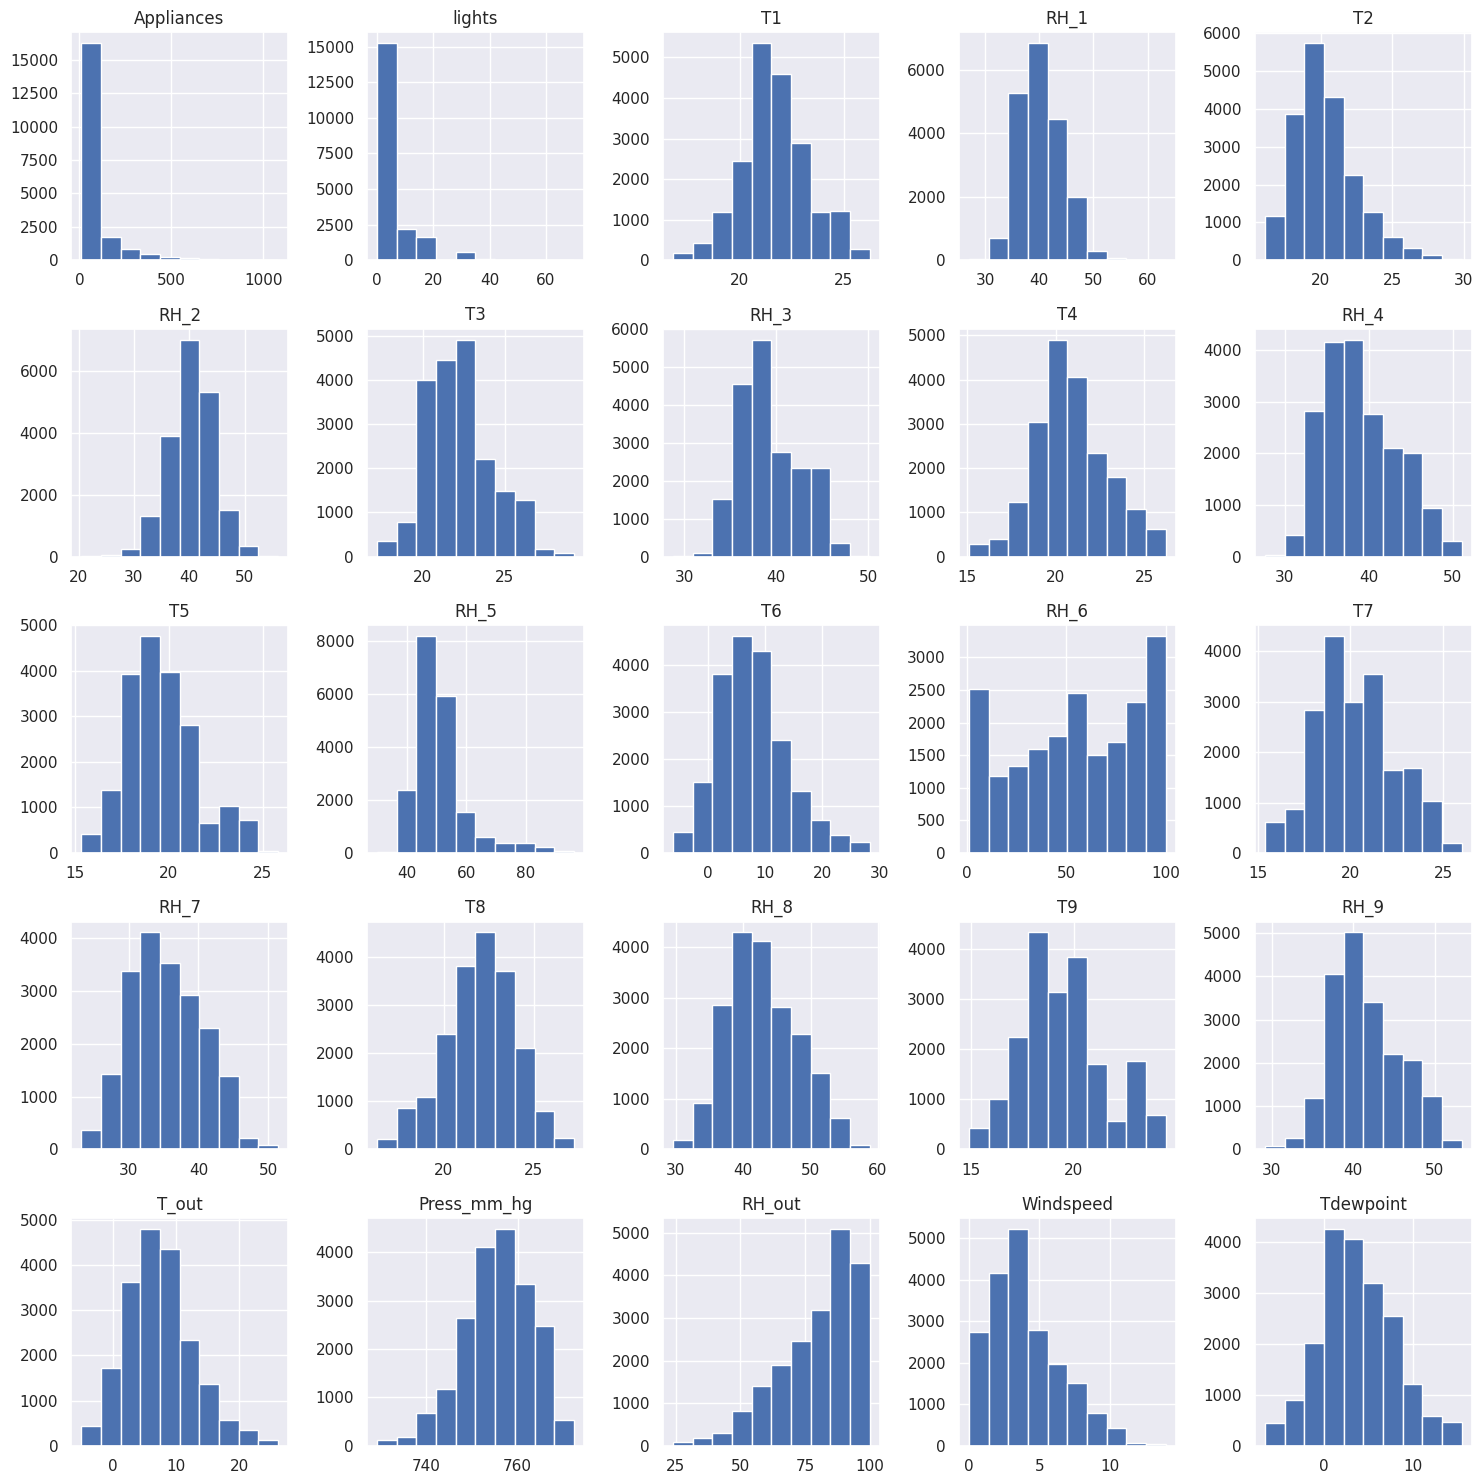

In [16]:
numeric_col=df.select_dtypes(exclude= 'O').drop(drplist,axis=1).columns.to_list()
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(15,15))

axes= axes.flatten()

for i,variable in enumerate(numeric_col):
  df[variable].hist(ax=axes[i])
  axes[i].set_title(variable)

fig.tight_layout()
plt.show()


In [17]:
df.columns = df.columns.str.strip()

### Check Outliers with Boxplot

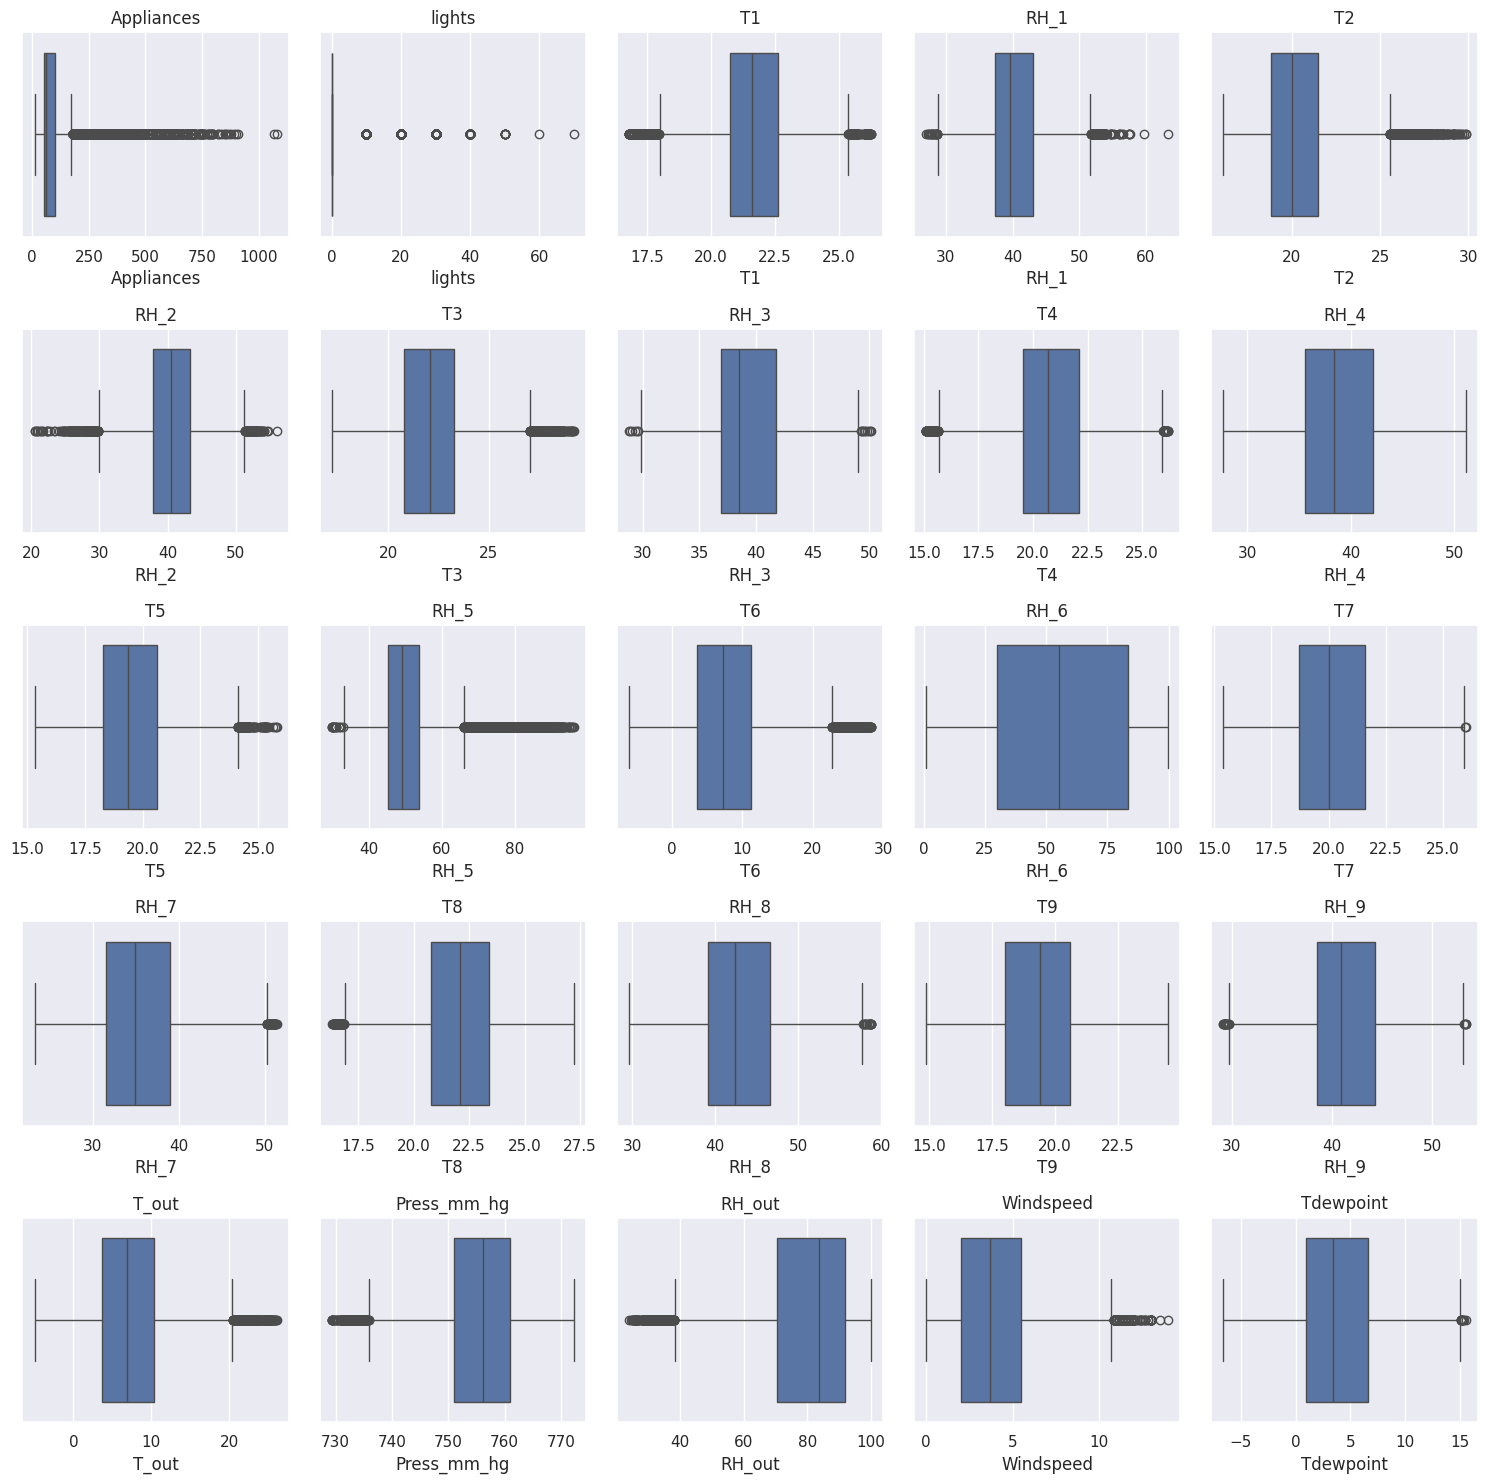

<Figure size 1500x800 with 0 Axes>

In [18]:
numreical_col=df.select_dtypes(exclude ='O').drop(drplist,axis = 1).columns.tolist()
fig,axes=plt.subplots(nrows=5,ncols=5, figsize=(15,15))

axes=axes.flatten()

for i,variable in enumerate(numreical_col):
  sns.boxplot(x=df[variable],ax=axes[i])
  axes[i].set_title(variable)
if len(numreical_col) < len(axes):
  for j in range(len(numreical_col)-len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()
plt.savefig(f'outlier.png')

## **Bivariate Analysis**

In [19]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'date_1', 'day_num', 'weekday', 'month',
       'time', 'hour', 'week', 'day_type'],
      dtype='object')

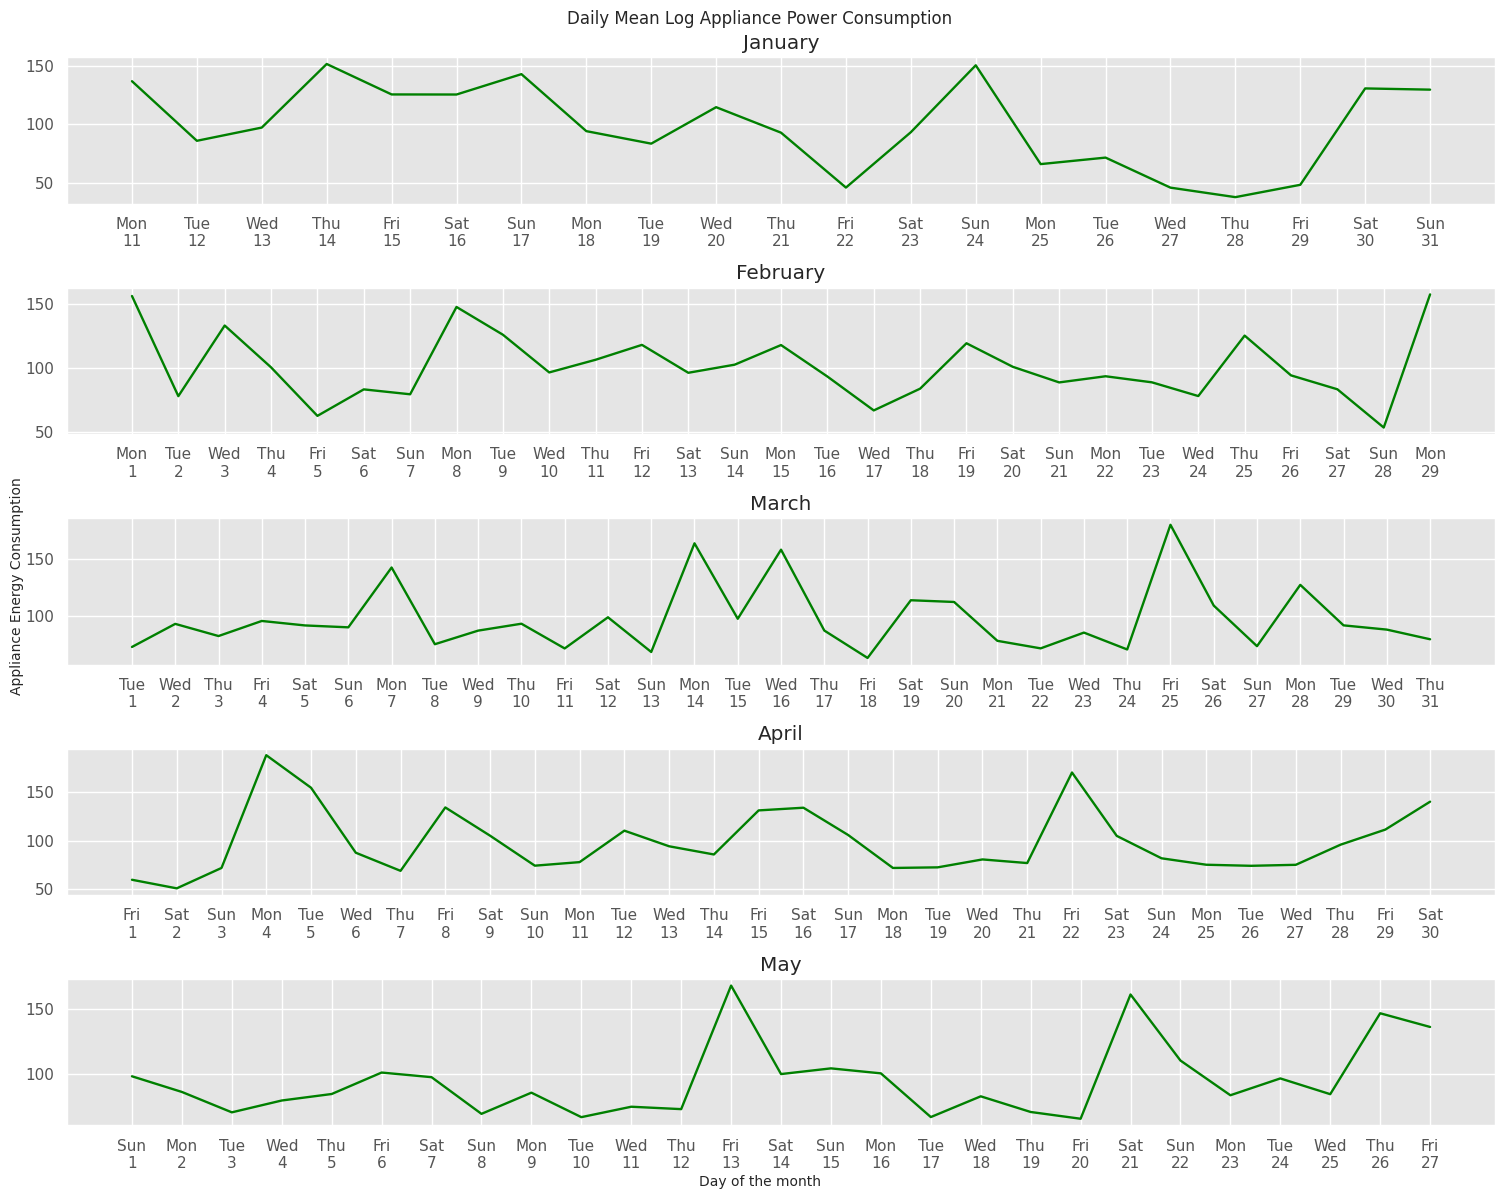

In [20]:
plt.style.use('ggplot')
months = [1, 2, 3, 4, 5]
m_names = ['January', 'February', 'March', 'April', 'May']
subplots = [511, 512, 513, 514, 515]

fig, axes = plt.subplots(len(months), 1, figsize=(15, 12))

for i, (month, m_name) in enumerate(zip(months, m_names)):
    ax = axes[i]
    df_month = df[df['month'] == month]
    sorted_dates = sorted(list(df_month['date_1'].unique()))

    #get daily appliance means for the current month
    y = df_month.groupby('date_1').agg({'Appliances': 'mean'}).Appliances.to_list()

    ax.plot(sorted_dates, y, color='green', linewidth=1.7)
    ax.set_title(m_name)

    #set the xtick positions and labels
    day_of_week_labels = [date.strftime('%a') for date in sorted_dates]
    day_of_month_labels = [date.day for date in sorted_dates]

    x_labels = [f'{dow}\n{dom}' for dow, dom in zip(day_of_week_labels, day_of_month_labels)]
    #concatenate labels

    ax.set_xticks(sorted_dates)
    ax.set_xticklabels(x_labels)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle('Daily Mean Log Appliance Power Consumption')
fig.text(0, 0.5, 'Appliance Energy Consumption', va='center', rotation='vertical')
fig.text(0.5, 0, 'Day of the month', ha='center')
plt.tight_layout()
plt.savefig('Daily Mean Log Appliance Power Consumption.png')
plt.show();

In [21]:
df.day_num.value_counts()

,count
day_num,
1,2880
2,2880
3,2880
4,2845
0,2778
5,2736
6,2736


In [22]:
df[['hour','Appliances']].value_counts().nunique()

123

### Hourly Energy Consumption Trends

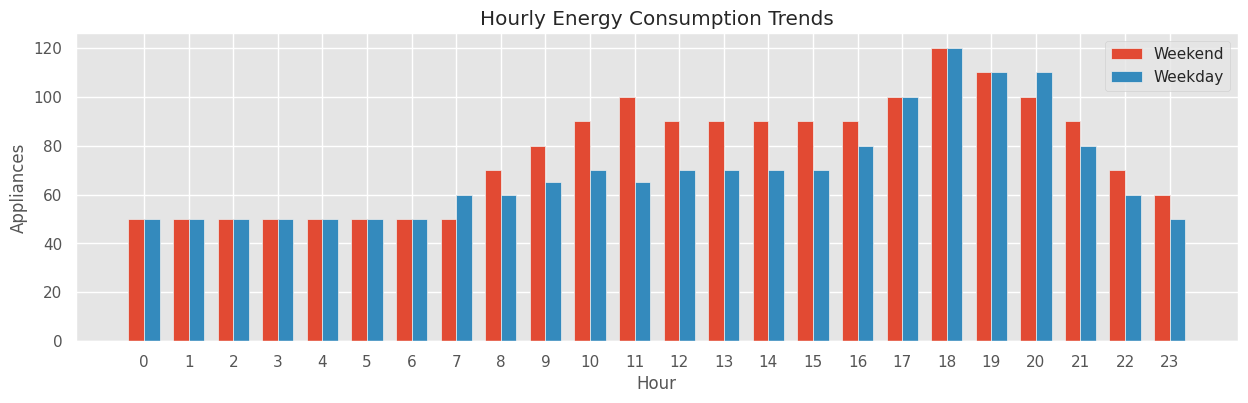

In [23]:
grouped = df.groupby(['hour','day_type'])['Appliances'].median().reset_index() #weekday

# Filtered data with weekends and weekday
weekends=grouped[grouped['day_type']=='1']
weekdays=grouped[grouped['day_type']=='0']

bar_width = 0.35

x = np.arange(len(weekends['hour']))
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(x - bar_width/2, weekends['Appliances'], bar_width, label='Weekend')
ax.bar(x + bar_width/2, weekdays['Appliances'], bar_width, label='Weekday')

ax.set_xticks(x)
ax.set_xticklabels(weekends['hour'])
ax.set_xlabel('Hour')
ax.set_ylabel('Appliances')
ax.set_title('Hourly Energy Consumption Trends')
ax.legend()
plt.savefig(f'Weekend-vc-Weekday-hourly-trends.png')
plt.show()

### **weekends and weekdays energy consumptions**


*   Evening Time 18:00 is more energy consumption shown in weekend and weekdays
*   Follow by weekend time between 8 to 11 energy consumption is labber is increased
*   In weekdays used less energy consumption then weekend Or they were not at home



In [24]:
def corr_map(df,title,savefig_name='corr_map.jpg', method='spearman',
             numeric_only = True, tick_size = 10, annot_size=14,
             annot_kws=8, cbar=False):

    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))

    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only),
                          fmt = '.2f', cbar=cbar, annot = True,
                          annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')

    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.tight_layout()
    plt.savefig(savefig_name)
    plt.show();

In [25]:
droplist = ['month','date_1','time','rv1','rv2','hour',
       'Visibility','weekday','week','day_num','day_type']


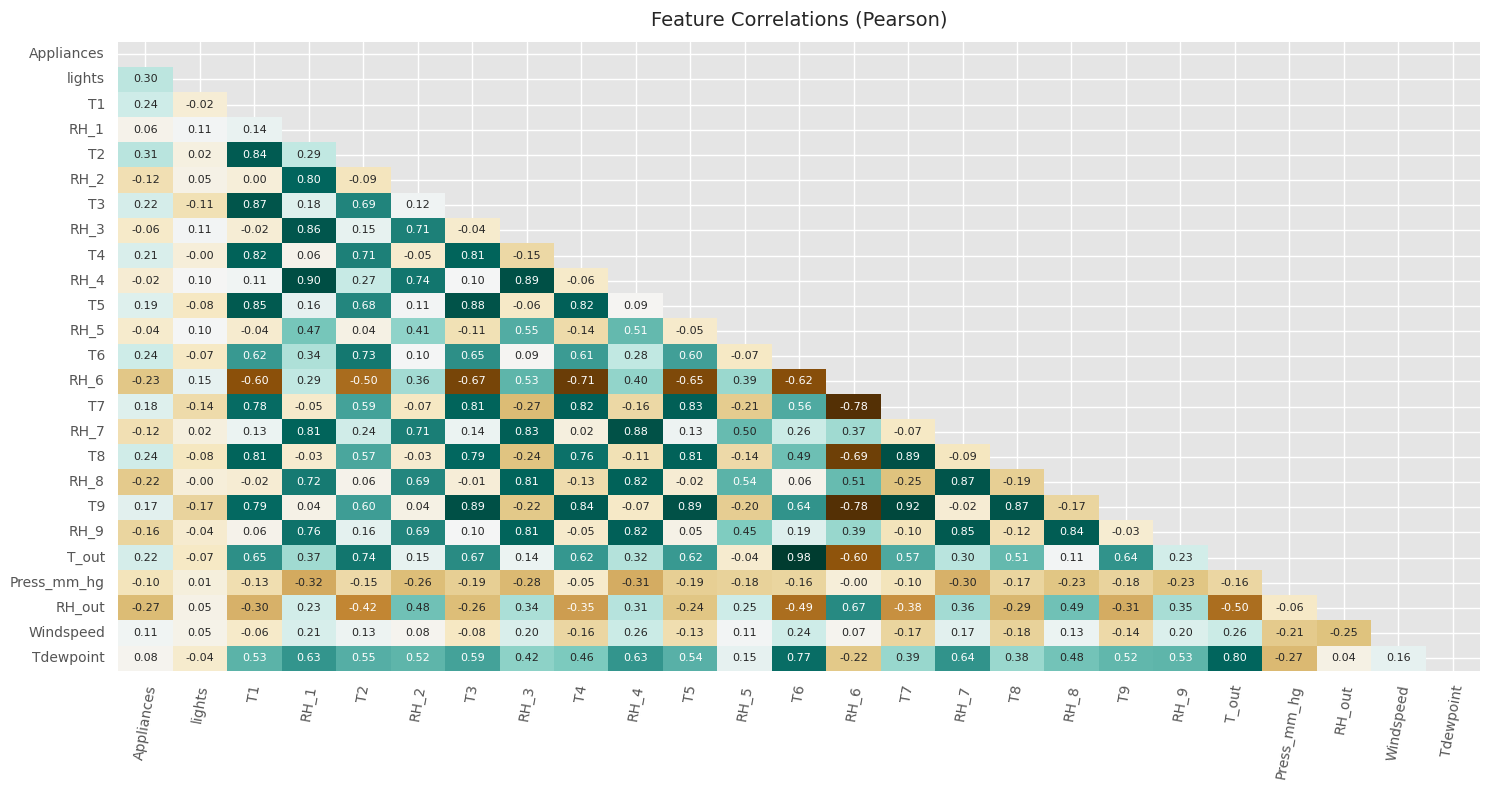

In [26]:
corr_map(df.drop(droplist,axis =1), method='spearman',
         title='Feature Correlations (Pearson)', cbar=False,
         savefig_name = 'pearson_correlations.jpg')



The Magnus-Tetens approximation or the August-Roche-Magnus formula, which is commonly used to estimate dew point or saturation vapor pressure in atmospheric science and meteorology.

This empirical formula is widely referenced in climate science, weather forecasting, and environmental engineering for calculating humidity-related variables.



The formula for dew point is $T_d = \frac{243.04 \times \left( \ln\left(\frac{\text{RH}}{100}\right) + \frac{17.625 \times T}{243.04 + T} \right)}{\left(17.625 - \ln\left(\frac{\text{RH}}{100}\right) - \frac{17.625 \times T}{243.04 + T}\right)}$.

where:
- \( T_d \): Dew point temperature (°C)
- \( T \): Ambient temperature (°C)
- \( \text{RH} \): Relative humidity as a percentage (0-100)


In [27]:
## lets define a csutom function for calculating dew point temperatures, based on emprical laws
def tdewpoint(df, ambient_rh, ambient_temp, tdew_new ):

    numer = np.log(df[ambient_rh]/100) + 17.625*df[ambient_temp]/(243.04+df[ambient_temp])

    df[tdew_new] = 234.04*numer/(17.625-numer)
    return print(df[[tdew_new,'Tdewpoint']].corr(method='spearman'), '\n')

In [28]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'date_1', 'day_num', 'weekday', 'month',
       'time', 'hour', 'week', 'day_type'],
      dtype='object')

In [29]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_1,day_num,weekday,month,time,hour,week,day_type
0,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275,2016-01-11,0,0,1,17:00:00,17,2,0
1,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.480,733.600,92.000,6.667,59.167,5.200,18.606,18.606,2016-01-11,0,0,1,17:10:00,17,2,0
2,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.370,733.700,92.000,6.333,55.333,5.100,28.643,28.643,2016-01-11,0,0,1,17:20:00,17,2,0
3,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410,2016-01-11,0,0,1,17:30:00,17,2,0
4,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.130,733.900,92.000,5.667,47.667,4.900,10.084,10.084,2016-01-11,0,0,1,17:40:00,17,2,0


In [30]:
tdewpoint(df = df, ambient_rh='RH_out', ambient_temp='T_out', tdew_new= 'T_out_6')
tdewpoint(df = df, ambient_rh='RH_6', ambient_temp='T6', tdew_new= 'Tdew_6')

           T_out_6  Tdewpoint
T_out_6      1.000      1.000
Tdewpoint    1.000      1.000 

           Tdew_6  Tdewpoint
Tdew_6      1.000      0.210
Tdewpoint   0.210      1.000 



### First Correlation Matrix Observation

- T_out_6 vs. T_out_6: The correlation coefficient is 1.000, indicating a perfect positive correlation with itself, as expected.

- T_out_6 vs. Tdewpoint: The correlation coefficient is 0.662, indicating a strong positive correlation with Tdewpoint.This refers that higher temperatures measured as T_out_6 are associated with higher dew points. but not perfect

- Tdewpoint vs. Tdewpoint: The correlation coefficient is 1.000, indicating a perfect positive correlation with itself.

### Second Correlation Matrix Observation

- Tdew_6 vs. T_dew_6: The correlation coefficient is 1.000, indicating a perfect posistive correlation with itself.

- Tdew_6 vs. Tdewpoint : The correlation coefficient is 1.000, indicating a perfect posistive correlation with itself.

### **Both are calculated in a way that ensures they have identical values.**

In [31]:
temp_col

['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

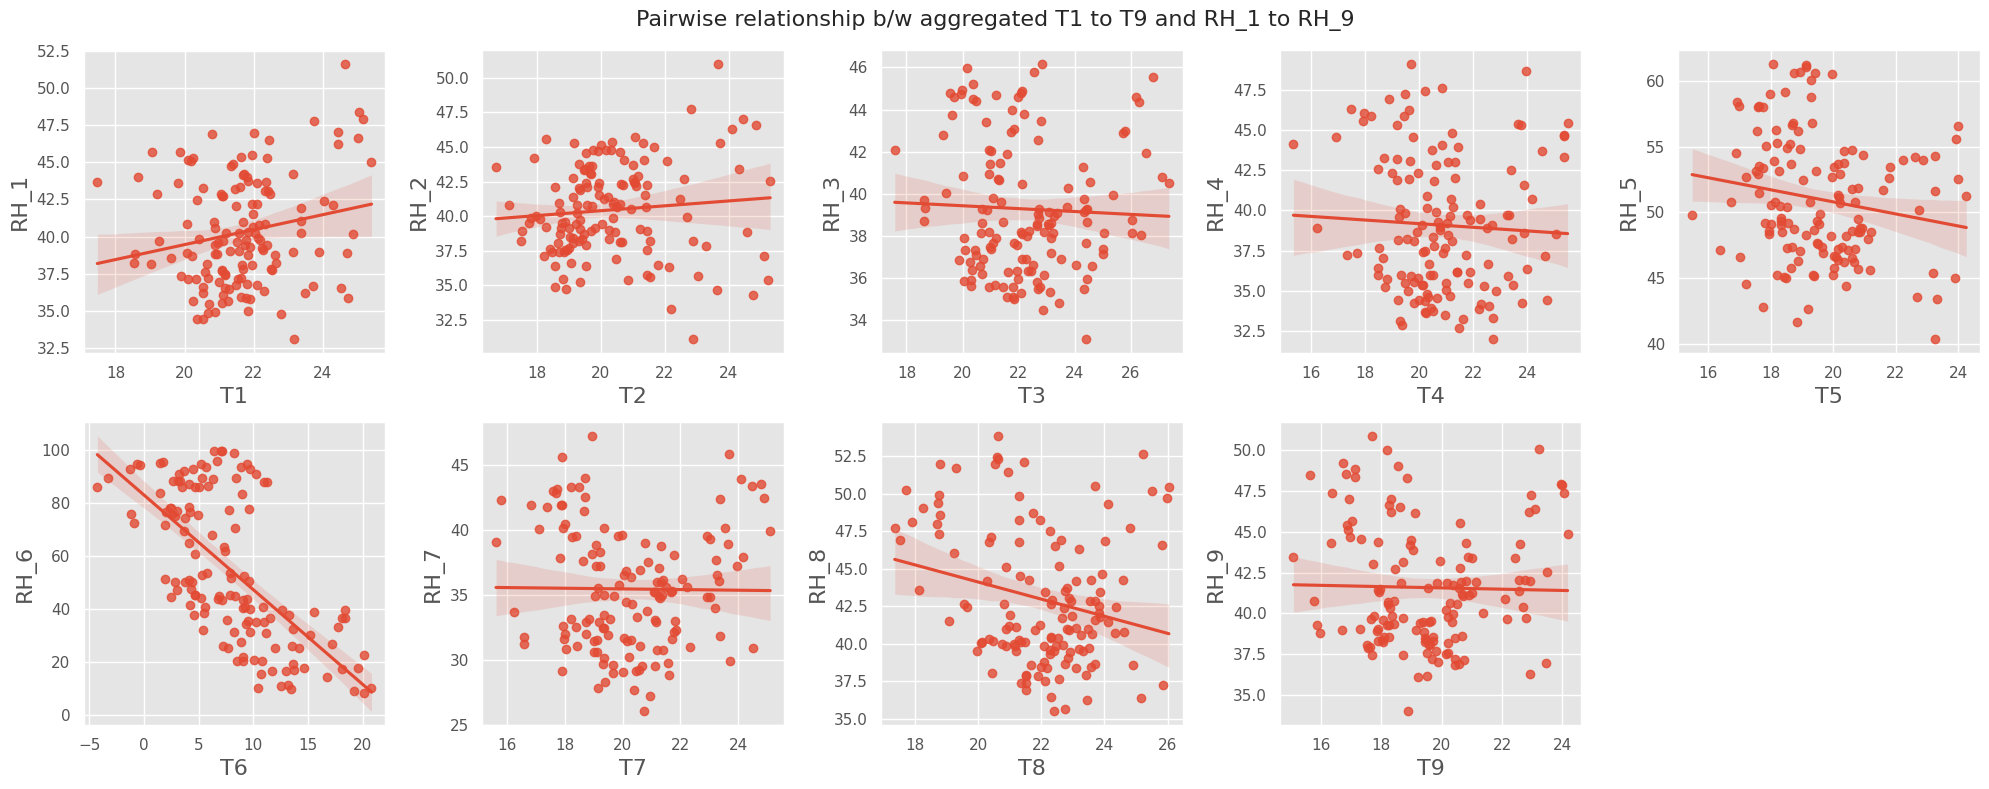

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))

for idx,(temp,hum) in enumerate (zip(temp_col,temp_hum)):
  ax= axes[idx//5,idx%5] # subplot axis

  sns.regplot(x=df.groupby('date_1')[temp].mean(),y=df.groupby('date_1')[hum].mean(),ax=ax)
  ax.set_xlabel(temp,fontsize=16)
  ax.set_ylabel(hum,fontsize=16)
  axes[1,4].set_visible(False)
plt.suptitle('Pairwise relationship b/w aggregated T1 to T9 and RH_1 to RH_9',size=16)
plt.tight_layout()
plt.savefig('Pairwise relationship bw aggregated t1-t9 and rh_1-rh_9.png')
plt.show()

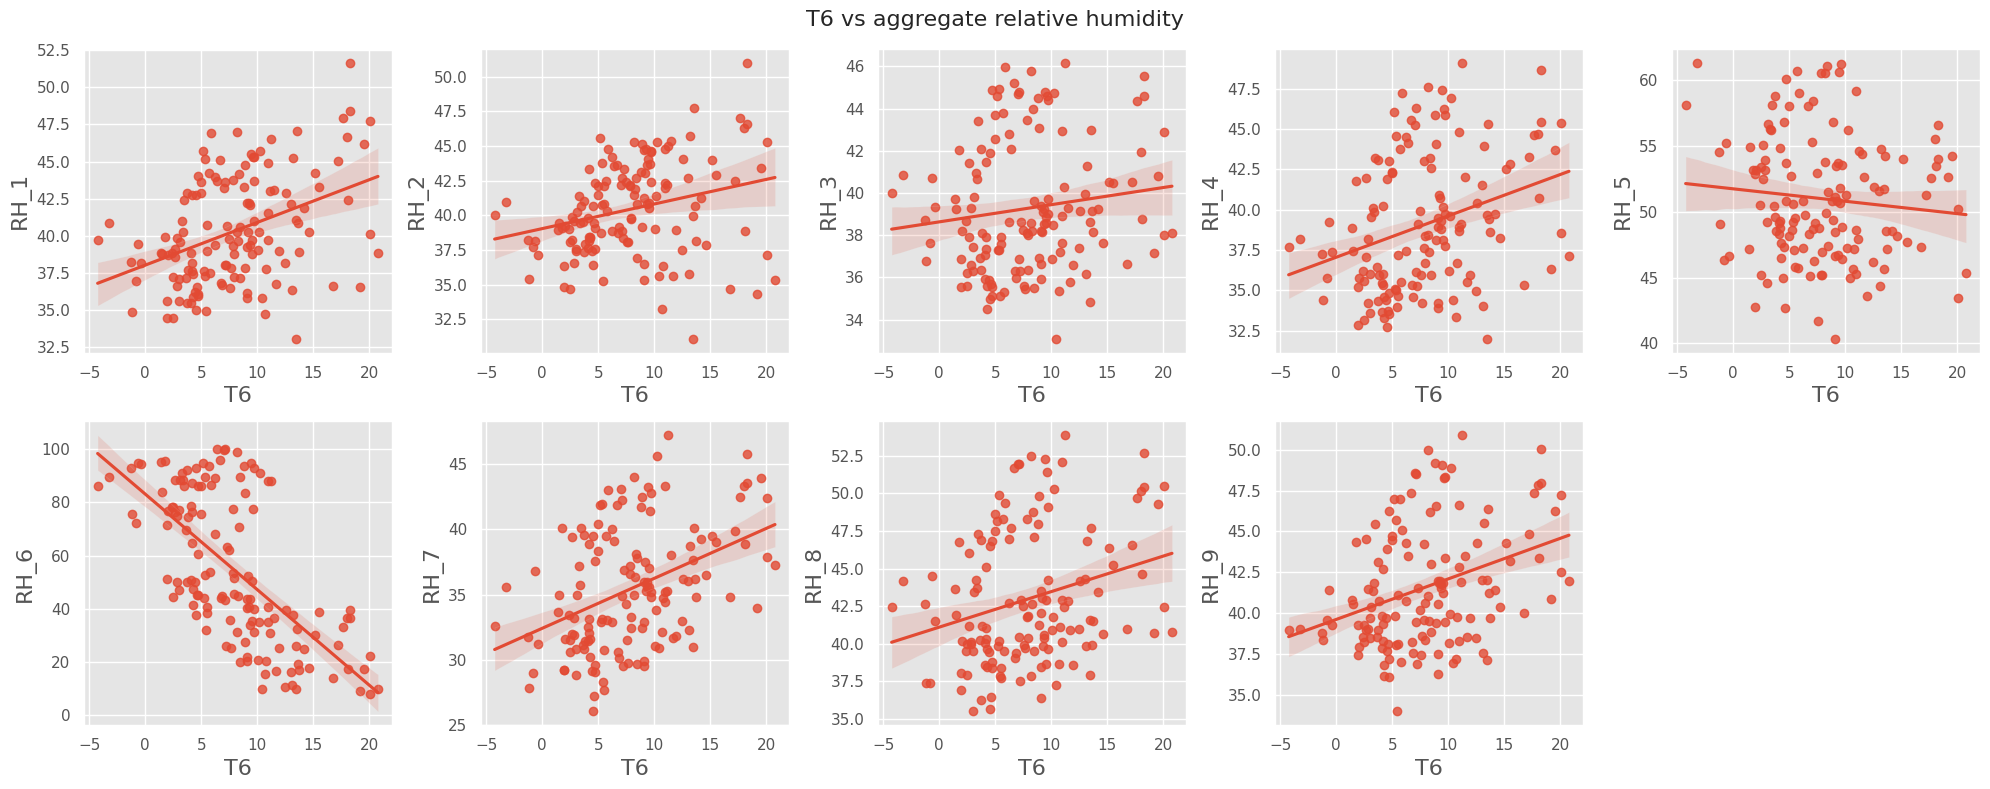

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for idx, (temp, hum) in enumerate(zip(temp_col, temp_hum)):
    ax = axes[idx//5, idx%5]  #get subplot axis

    sns.regplot(x=df.groupby('date_1')['T6'].mean(), y=df.groupby('date_1')[hum].mean(), ax=ax)
    ax.set_xlabel('T6', fontsize = 16)
    ax.set_ylabel(hum, fontsize = 16)
    axes[1,4].set_visible(False)
plt.suptitle('T6 vs aggregate relative humidity', size= 16)
plt.savefig('T6 vs aggregate relative humidity.png')

plt.tight_layout()
plt.show()

## **Multivariate Analysis**

In [34]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'date_1', 'day_num', 'weekday', 'month',
       'time', 'hour', 'week', 'day_type', 'T_out_6', 'Tdew_6'],
      dtype='object')

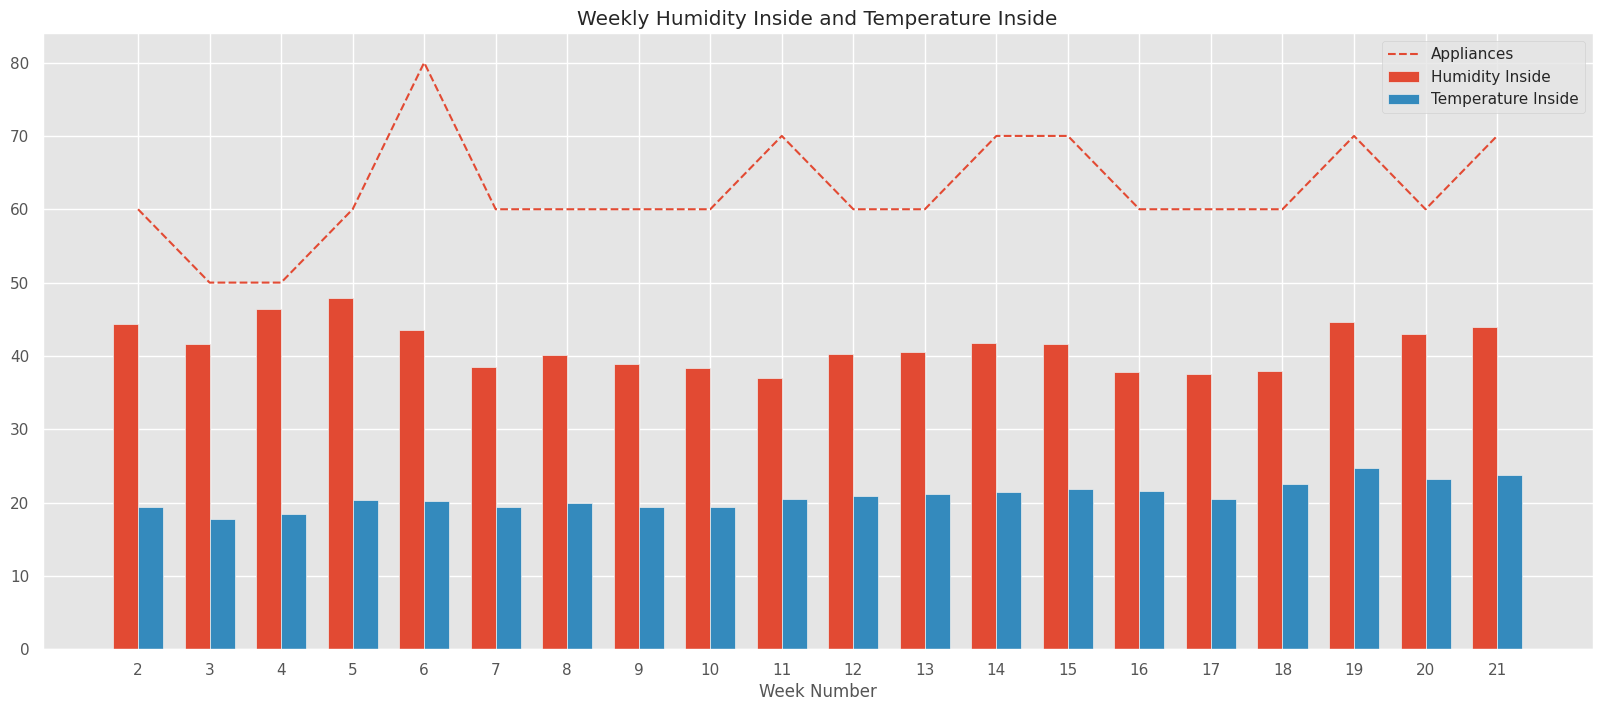

In [35]:
df['humidity_inside'] = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)
df['temperature_inside'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)

MultvariateDF = df[['week', 'humidity_inside', 'temperature_inside','Appliances']].groupby('week')[['humidity_inside', 'temperature_inside','Appliances']].median().reset_index()

bar_width = 0.35
bar_offset = bar_width/2

fig, ax = plt.subplots(figsize=(20,8))

plt.bar(MultvariateDF['week'] - bar_offset, MultvariateDF['humidity_inside'], width=bar_width, align='center', label='Humidity Inside')
plt.bar(MultvariateDF['week'] + bar_offset, MultvariateDF['temperature_inside'], width=bar_width, align='center', label='Temperature Inside')
plt.plot(MultvariateDF['week'], MultvariateDF['Appliances'], label='Appliances', linestyle = '--')

plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Humidity Inside and Temperature Inside')
plt.xticks(MultvariateDF['week'])

plt.legend()

plt.show()


- Appliances can affect both humidity and temperature within a room, sometimes simultaneously increasing one while decreasing the other. For example, air conditioners can lower temperature by dehumidifying the air, while refrigerators and other appliances can release moisture, increasing humidity.

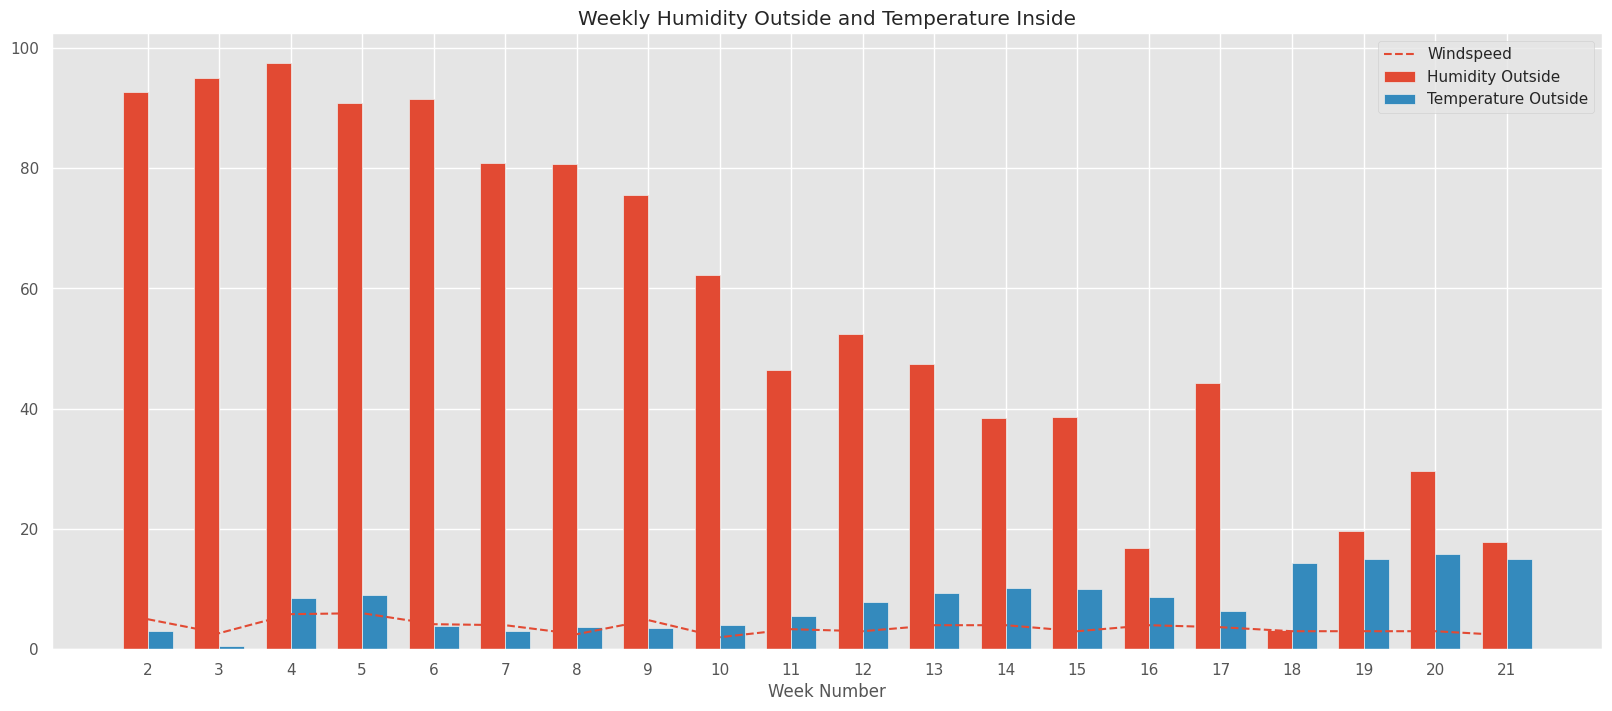

In [36]:
df['temperature_outside'] = df['T6']
df['humidity_outside'] = df['RH_6']

MultvariateDF = df[['week', 'humidity_outside', 'temperature_outside','Windspeed']].groupby('week')[['humidity_outside', 'temperature_outside','Windspeed']].median().reset_index()

bar_width = 0.35
bar_offset = bar_width/2

fig, ax = plt.subplots(figsize=(20,8))

plt.bar(MultvariateDF['week'] - bar_offset, MultvariateDF['humidity_outside'], width=bar_width, align='center', label='Humidity Outside')
plt.bar(MultvariateDF['week'] + bar_offset, MultvariateDF['temperature_outside'], width=bar_width, align='center', label='Temperature Outside')
plt.plot(MultvariateDF['week'], MultvariateDF['Windspeed'], label='Windspeed', linestyle = '--')

plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Humidity Outside and Temperature Inside')
plt.xticks(MultvariateDF['week'])

plt.legend()

plt.show()

- Relative humidity (RH) is a measure of the amount of water vapor in the air relative to the temperature of the air. The same amount of water vapor will result in higher relative humidity in cooler air than in warmer air.

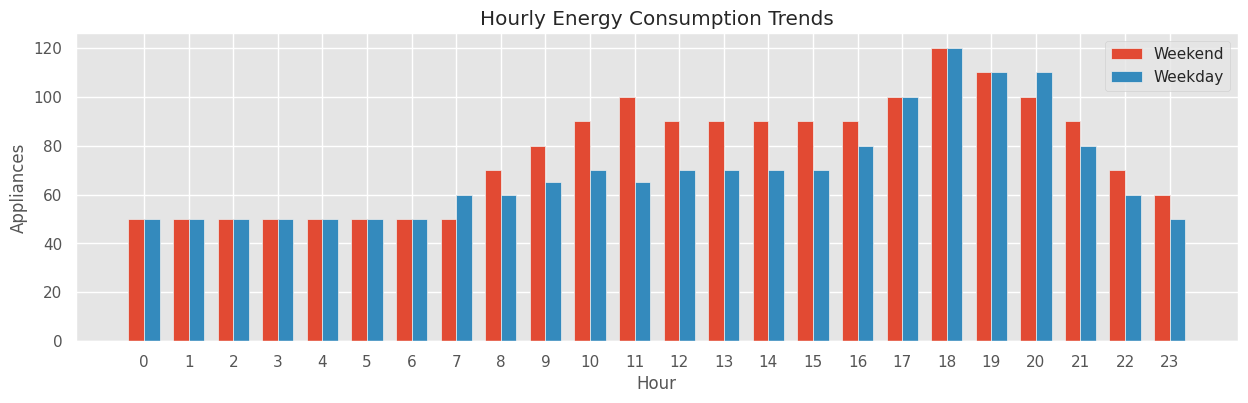

In [37]:
grouped = df.groupby(['hour','day_type'])['Appliances'].median().reset_index() #weekday

# Filtered data with weekends and weekday
weekends=grouped[grouped['day_type']=='1']
weekdays=grouped[grouped['day_type']=='0']

bar_width = 0.35

x = np.arange(len(weekends['hour']))
fig, ax = plt.subplots(figsize=(15, 4))
ax.bar(x - bar_width/2, weekends['Appliances'], bar_width, label='Weekend')
ax.bar(x + bar_width/2, weekdays['Appliances'], bar_width, label='Weekday')

ax.set_xticks(x)
ax.set_xticklabels(weekends['hour'])
ax.set_xlabel('Hour')
ax.set_ylabel('Appliances')
ax.set_title('Hourly Energy Consumption Trends')
ax.legend()
plt.savefig(f'Weekend-vc-Weekday-hourly-trends.png')
plt.show()

**Weekdays:**


---



* **Early Morning (0-7 AM)**: Low usage as most people are asleep.  
* **Morning Peak (8 AM - 6 PM)**: Increased usage as people wake up, prepare for work/school, and start their daily routines. This includes activities like cooking, showering, and using electronic devices.  
* **Evening Dip (6 PM - 11 PM)**: Decreased usage as people return home and relax, with some activities like cooking and watching TV.  





**Weekends:**


---


* **Early Morning (0-7 AM)**: Similar to weekdays, low usage during sleep hours.  
* **Morning/Afternoon (8 AM - 4 PM)**: Gradual increase in usage as people wake up later and engage in leisure activities like cleaning, cooking, and using electronic devices.  
* **Afternoon Dip (12 PM - 4 PM)**: A brief period of lower usage, possibly due to outdoor activities or meal times.  
* **Evening Peak (5 PM - 6 PM)**: Another increase in usage as people prepare dinner and engage in evening activities.  
* **Late Evening (6 PM - 11 PM)**: Decreased usage as people wind down for the night.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Appliances           19735 non-null  int64  
 1   lights               19735 non-null  int64  
 2   T1                   19735 non-null  float64
 3   RH_1                 19735 non-null  float64
 4   T2                   19735 non-null  float64
 5   RH_2                 19735 non-null  float64
 6   T3                   19735 non-null  float64
 7   RH_3                 19735 non-null  float64
 8   T4                   19735 non-null  float64
 9   RH_4                 19735 non-null  float64
 10  T5                   19735 non-null  float64
 11  RH_5                 19735 non-null  float64
 12  T6                   19735 non-null  float64
 13  RH_6                 19735 non-null  float64
 14  T7                   19735 non-null  float64
 15  RH_7                 19735 non-null 

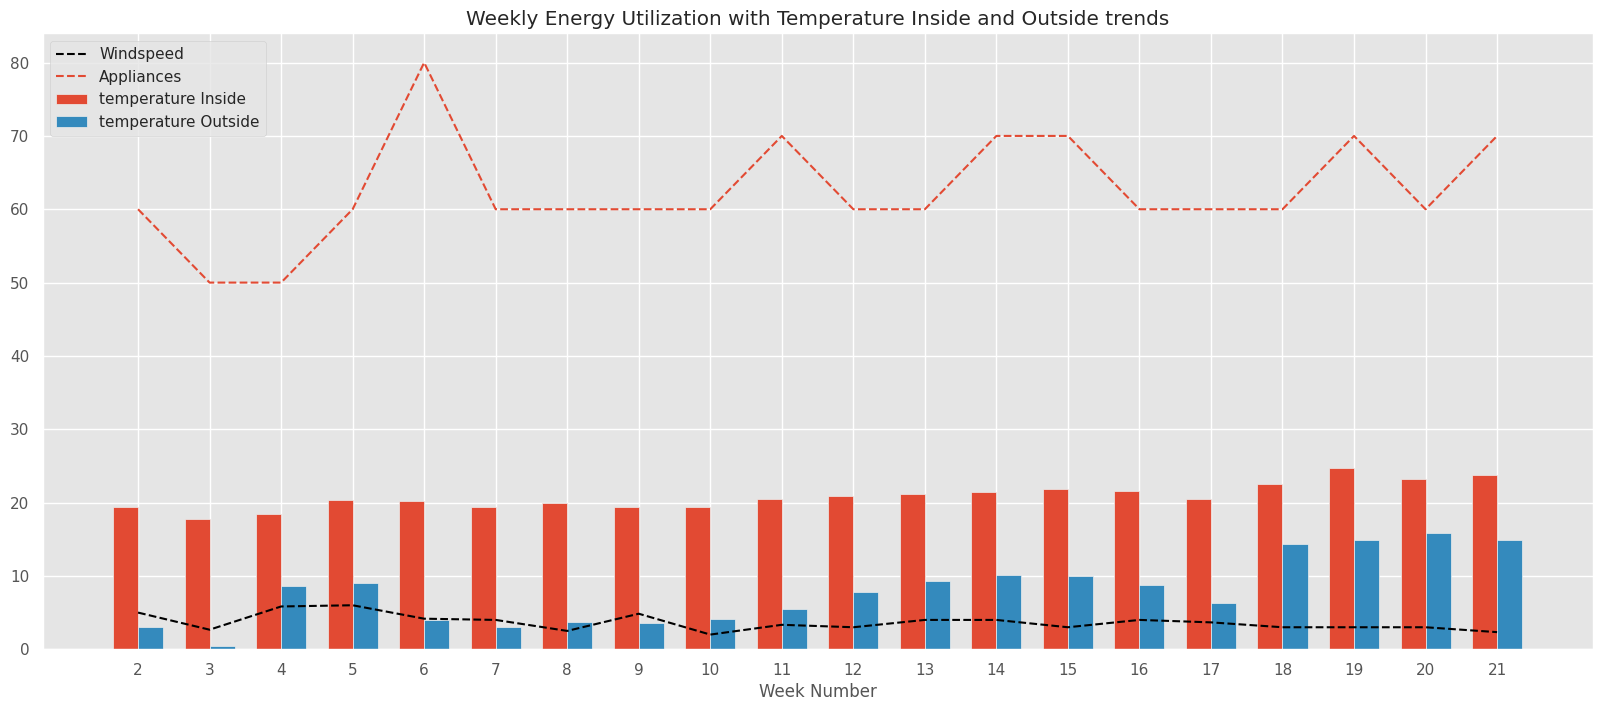

In [39]:
#Calclate inside and outside Temperatures
df['temperature_inside'] = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9']].mean(axis=1)
df['temperature_outside'] = df['T6']

# Prepare data for weekly Analysis

MultvariateDF = df[['week', 'temperature_inside', 'temperature_outside', 'Windspeed','Appliances']]\
.groupby('week')[['temperature_inside', 'temperature_outside', 'Windspeed','Appliances']].median().reset_index()
MultvariateDF['Windspeed'] = MultvariateDF['Windspeed']

# create a Bar and Line Chart
bar_width = 0.35
bar_offset = bar_width / 2

fig, ax = plt.subplots(figsize=(20,8))

plt.bar(MultvariateDF['week'] - bar_offset, MultvariateDF['temperature_inside'], width=bar_width, align='center', label='temperature Inside')
plt.bar(MultvariateDF['week'] + bar_offset, MultvariateDF['temperature_outside'], width=bar_width, align='center', label='temperature Outside')
plt.plot(MultvariateDF['week'], MultvariateDF['Windspeed'], label='Windspeed', c = 'black', linestyle = '--')
plt.plot(MultvariateDF['week'], MultvariateDF['Appliances'], label='Appliances', linestyle = '--')

plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Energy Utilization with Temperature Inside and Outside trends')
plt.xticks(MultvariateDF['week'])

plt.legend()

plt.savefig(f'Appliances-trends-with-temperature-Inside-and-Outside.png')
plt.show()

### **Summary**


*   **Temperature**:- Temperature inside the house varies between 17.76 degrees to 24.779 degrees and outside of the house Temperature between 0.485 degrees to 15.79 degrees
*   **windspeed** :- Windspeed between 2 m\s to 6 m\s they don't have highlighted changes.
*  **Appliances**:- Appliances are drastically changing in the week period.



In [40]:
MultvariateDF = df[['week', 'temperature_inside', 'temperature_outside', 'Windspeed','Appliances']]\
.groupby('week')['temperature_inside'].median().reset_index()
print('Minimum Temperature inside : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Temperature inside :',MultvariateDF.max())

Minimum Temperature inside :  week                  2.000
temperature_inside   17.769
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Temperature inside : week                 21.000
temperature_inside   24.779
dtype: Float64


In [41]:
MultvariateDF = df[['week', 'temperature_inside', 'temperature_outside', 'Windspeed','Appliances']]\
.groupby('week')['temperature_outside'].median().reset_index()
print('Minimum Temperature Outside : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Temperature Outside :',MultvariateDF.max())

Minimum Temperature Outside :  week                  2.000
temperature_outside   0.485
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Temperature Outside : week                  21.000
temperature_outside   15.796
dtype: Float64


In [42]:
MultvariateDF = df[['week', 'temperature_inside', 'temperature_outside', 'Windspeed','Appliances']]\
.groupby('week')['Windspeed'].median().reset_index()
print('Minimum wind speed : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum wind speed :',MultvariateDF.max())

Minimum wind speed :  week        2.000
Windspeed   2.000
dtype: Float64

 --------------------------------------------------------------------------------
Maximum wind speed : week        21.000
Windspeed    6.000
dtype: Float64


In [43]:
MultvariateDF = df[['week', 'temperature_inside', 'temperature_outside', 'Windspeed','Appliances']]\
.groupby('week')['Appliances'].median().reset_index()
print('Minimum Appliances : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Appliances :',MultvariateDF.max())

Minimum Appliances :  week          2.000
Appliances   50.000
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Appliances : week         21.000
Appliances   80.000
dtype: Float64


### **Weekly Energy Utilization with Humidity Inside and Outside**


---



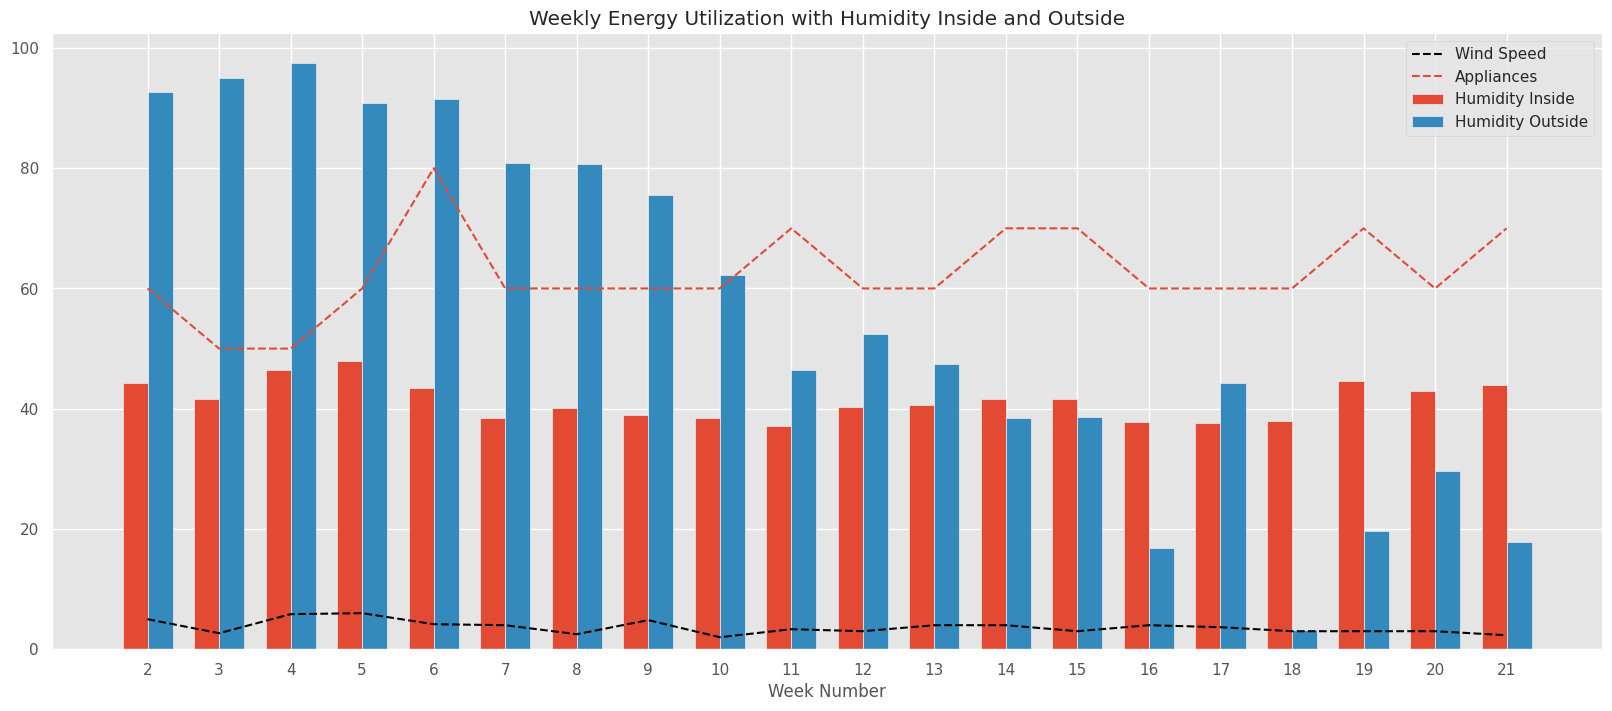

In [44]:
df['humidity_inside'] = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)
df['humidity_outside'] = df['RH_6']

MultvariateDF = df[['week', 'humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']].groupby('week')[['humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']].median().reset_index()
MultvariateDF['Windspeed'] = MultvariateDF['Windspeed']

bar_width = 0.35
bar_offset = bar_width/2

fig, ax = plt.subplots(figsize=(20,8))

plt.bar(MultvariateDF['week'] - bar_offset, MultvariateDF['humidity_inside'], width=bar_width, align='center', label='Humidity Inside')
plt.bar(MultvariateDF['week'] + bar_offset, MultvariateDF['humidity_outside'], width=bar_width, align='center', label='Humidity Outside')
plt.plot(MultvariateDF['week'], MultvariateDF['Windspeed'], label='Wind Speed', c = 'black', linestyle = '--')
plt.plot(MultvariateDF['week'], MultvariateDF['Appliances'], label='Appliances', linestyle = '--')

plt.xlabel('Week Number')
plt.ylabel('')
plt.title('Weekly Energy Utilization with Humidity Inside and Outside')
plt.xticks(MultvariateDF['week'])

plt.legend()

plt.savefig(f'Appliances-trends-with-humidity-Inside-and-Outside.png')
plt.show()

### **Summary**


*   **humidity**:- Inside humidity between 37.05 degrees to 47.85 degrees and outside between 3.28 degrees to 97.56 degrees.
*   **Windspeed**:-wind speed is reamain same over the weeek.



In [45]:
MultvariateDF = df[['week', 'humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']]\
.groupby('week')[['humidity_inside']].median().reset_index()
print('Minimum Humidiity inside : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Humidiity inside :',MultvariateDF.max())

Minimum Humidiity inside :  week               2.000
humidity_inside   37.055
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Humidiity inside : week              21.000
humidity_inside   47.855
dtype: Float64


In [46]:
MultvariateDF = df[['week', 'humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']]\
.groupby('week')[['humidity_outside']].median().reset_index()
print('Minimum Humidiity outside : ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Humidiity outside :',MultvariateDF.max())

Minimum Humidiity outside :  week               2.000
humidity_outside   3.283
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Humidiity outside : week               21.000
humidity_outside   97.562
dtype: Float64


In [47]:
MultvariateDF = df[['week', 'humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']]\
.groupby('week')[['Windspeed']].median().reset_index()
print('Minimum wind speed: ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum wind speed :',MultvariateDF.max())

Minimum wind speed:  week        2.000
Windspeed   2.000
dtype: Float64

 --------------------------------------------------------------------------------
Maximum wind speed : week        21.000
Windspeed    6.000
dtype: Float64


In [48]:
MultvariateDF = df[['week', 'humidity_inside', 'humidity_outside', 'Windspeed', 'Appliances']]\
.groupby('week')[['Appliances']].median().reset_index()
print('Minimum Appliances: ',MultvariateDF.min())
print('\n','-'*80)
print('Maximum Appliances :',MultvariateDF.max())

Minimum Appliances:  week          2.000
Appliances   50.000
dtype: Float64

 --------------------------------------------------------------------------------
Maximum Appliances : week         21.000
Appliances   80.000
dtype: Float64


# **Observation**

**1.Diurnal Variation in Indoor Humidity:**

* Indoor humidity fluctuates significantly throughout the day, with peaks during periods of high appliance usage (morning and evening).

* This suggests that appliances, especially those that release moisture (like refrigerators, dishwashers, and clothes dryers), are a major contributor to indoor humidity levels.




**2.Impact of Outdoor Temperature and Humidity on Indoor Conditions:**

* While indoor humidity is primarily influenced by appliance usage, outdoor conditions, especially relative humidity, can also play a role.

* When outdoor humidity is high, it can contribute to higher indoor humidity levels, especially if there is inadequate ventilation.

**3.Stable Outdoor Windspeed:**

* The consistent wind speed throughout the week indicates that wind-driven ventilation is not a significant factor influencing indoor humidity.

**4.Appliance Usage Patterns and Indoor Climate:**

* The correlation between appliance usage patterns and indoor humidity levels highlights the importance of energy-efficient appliances and proper ventilation to maintain optimal indoor air quality.

* By understanding these patterns, homeowners can take steps to reduce energy consumption and improve indoor comfort.

# **Model Training**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import time
from math import sqrt

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
temp_col=["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
temp_hum=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather_col=['Press_mm_hg','Windspeed','Visibility','Tdewpoint','T_out','RH_out']
light_col=['lights']
randoms_col=['rv1','rv2']
col_time=['hour','weekday']
col_target=['Appliances']

In [ ]:
## These features will be used to select the model, as it has train and validate split
feature_var = temp_col + temp_hum +  weather_col + light_col + col_time
target_var = col_target

In [ ]:
#separte dataset into train and  test
train,test= train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
#Split training dataset into independent and dependent variables
X_train = train[feature_var]
y_train = train[target_var]

#Split validate dataset into independent and dependent variables
X_test = test[feature_var]
y_test = test[target_var]

# We use below features after model selection for tuning our model
model_train_X = train[feature_var]
model_train_y = train[target_var]

model_test_X = test[feature_var]
model_test_y = test[target_var]

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 94.1127
- Mean Absolute Error: 53.1644
- train R2 Score: 0.1673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 91.1324
- Mean Absolute Error: 52.5858
- test R2 Score: 0.1701
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


Lasso
Model performance for Training set
- Root Mean Squared Error: 94.2900
- Mean Absolute Error: 52.9438
- train R2 Score: 0.1641
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 91.2485
- Mean Absolute Error: 52.3770
- test R2 Score: 0.1680
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


Ridge
Model performance for Training set
- Root Mean Squared Error: 94.1127
- Mean Absolute Error: 53.1640
- train R2 Score: 0.1673
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 91.1324
- Mean Absolute Error: 52.5855
- 

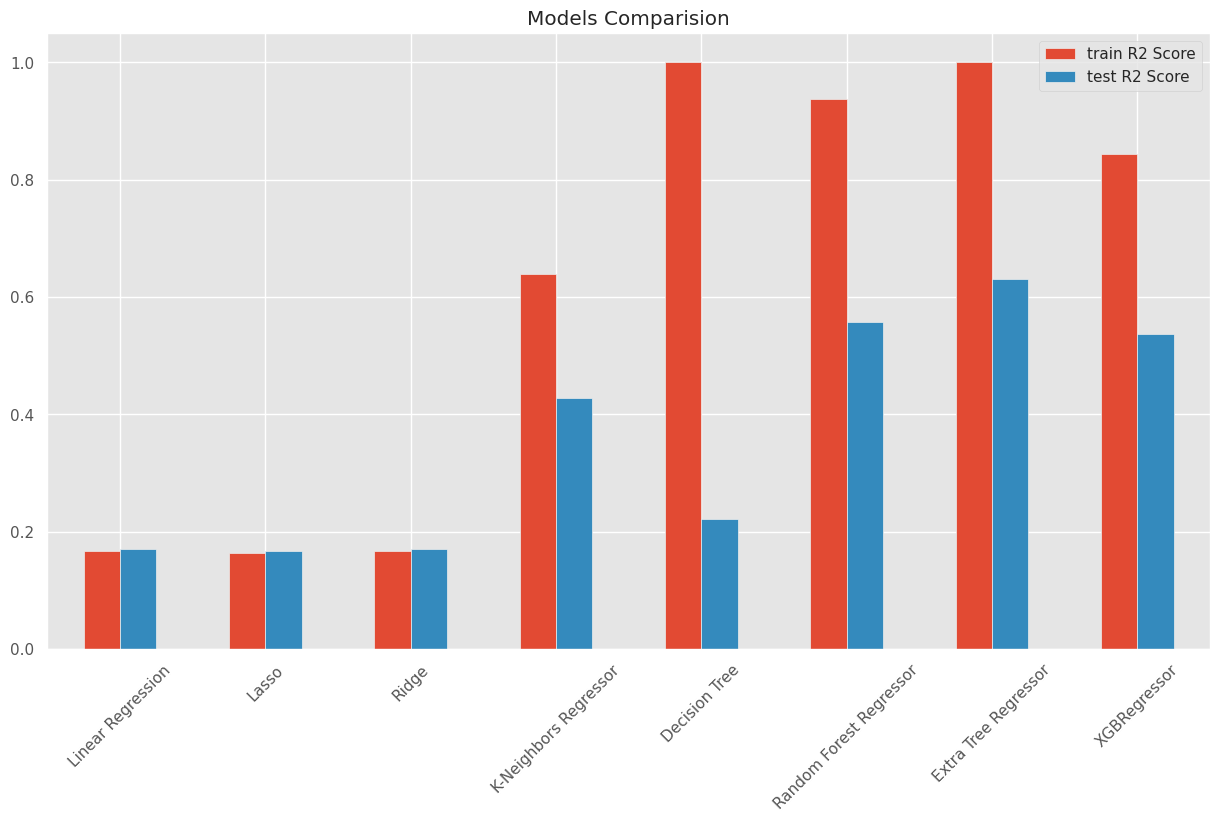

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    'SVR' : SVR(kernel='rbf'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    'Extra Tree Regressor':ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
# Create a dictionary to store model performance
model_performance = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_name = list(models.keys())[i]
    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- train R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- test R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    # Store model performance in the dictionary
    model_performance[model_name] = {
        'train R2 Score': model_train_r2,
        'test R2 Score': model_test_r2
    }

    print('* '*35)
    print('\n')

# Convert the model_performance dictionary to a DataFrame for plotting
import pandas as pd
model_performance_df = pd.DataFrame(model_performance).T

# Filter and plot the results
model_performance_df[model_performance_df['test R2 Score'] > 0][['train R2 Score', 'test R2 Score']].plot.bar()

#plt.figure(figsize = (8, 4))
plt.xlabel('')
plt.xticks(rotation = 45)
plt.ylabel('')
plt.title('Models Comparision')
#plt.savefig(f'Models-comparision.png')
plt.show()

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,Extra Tree Regressor,0.631
6,Random Forest Regressor,0.557
8,XGBRegressor,0.537
4,K-Neighbors Regressor,0.429
5,Decision Tree,0.222
2,Ridge,0.170
0,Linear Regression,0.170
1,Lasso,0.168
3,SVR,-0.095
9,AdaBoost Regressor,-0.442


## hyperparameters

In [ ]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

etr_params = {'n_estimators' : [350], 'criterion' : ['poisson'], 'max_depth' : [ 90,100,110], 'max_features' : ['sqrt', 'log2'], 'warm_start' : [False, True]}


In [ ]:
xtr = ExtraTreesRegressor(criterion='poisson',max_depth=100,max_features='log2', n_estimators=350,n_jobs=-1,random_state=40)
xtr.fit(model_train_X, model_train_y)

ExtraTreesRegressor(criterion='poisson', max_depth=100, max_features='log2',
                    n_estimators=350, n_jobs=-1, random_state=40)

In [ ]:
from sklearn import metrics
metrics.r2_score(model_test_y,xtr.predict(model_test_X))

0.6663196110370051

# **Recommation**

## Recommendations to Client: Optimizing Energy Utilization
Client’s building has higher internal temperatures than ambient air. which suggests the space is artificially heated. Since heating is the primary component of the client’s energy consumption, we have provided a series of recommendations, based on sound architectural and thermodynamic systems design, which aim to:

* reduce consumption
* increase efficiency of existing systems, and
* installation of new systems,
* A detailed cost-analysis can be provided to the client if the scope of work of this contract is extended by consensus.

**A.Retrofitting measures**: One-time, long-term solutions towards power savings

Floor heating, which causes vertical air currents for space heating
Sun-room on the western facing side to capture solar heat
Double-glazed glass walls/windows, which trap heat
Vertical louvers, along south-west walls

**B. Optimization measures:** Reducing energy consumption

- Since weekends during January, February and March see an uptick in consumption levels, it is recommended to switch to solar power during off-peak hours.

- Humidifiers, for frequently occupied shared spaces, would reduce energy consumption
---


*   Multiple ML algorithms were used on the dataset to arrive at the best prediction solution for the client.
*   We have compared the performance of 10 machine learning estimators

  -   Lasso, Ridge, Decision Tree, KNN, Random Forest, Extra Tree Regressor,AdaBoost Regressor,SVR,XGBRegressor,Linear Regression

* ExtraTreeRegressor model provides the best predictions for energy consumption.




# Best R2 score : 66.63%
R2 score on unseen data after hyperparameter tuning, using ExtraTreesRegressor